In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('singoli_cartelli.csv')

# We have a duplicated label that we can unify
df['name'] = df['name'].replace('maximum speed 10 km/h', 'maximum speed 10km/h')

print(df.describe().transpose())
print(df.columns)

            count         mean         std    min    25%     50%     75%  \
filename   5919.0  1543.496537  915.410171    0.0  716.0  1522.0  2328.0   
width      5919.0   501.457679   56.379081  200.0  512.0   512.0   512.0   
truncated  5919.0     0.009968    0.099349    0.0    0.0     0.0     0.0   
xmin       5919.0   229.264065  129.874697    1.0  114.0   228.0   340.0   
ymin       5919.0   173.663119   69.009198    1.0  126.0   175.0   217.0   
xmax       5919.0   273.800473  133.957388    6.0  153.0   281.0   388.0   
ymax       5919.0   226.533705   68.155232   16.0  183.0   222.0   263.0   

              max  
filename   3175.0  
width       512.0  
truncated     1.0  
xmin        507.0  
ymin        453.0  
xmax        512.0  
ymax        512.0  
Index(['filename', 'width', 'name', 'truncated', 'xmin', 'ymin', 'xmax',
       'ymax'],
      dtype='object')


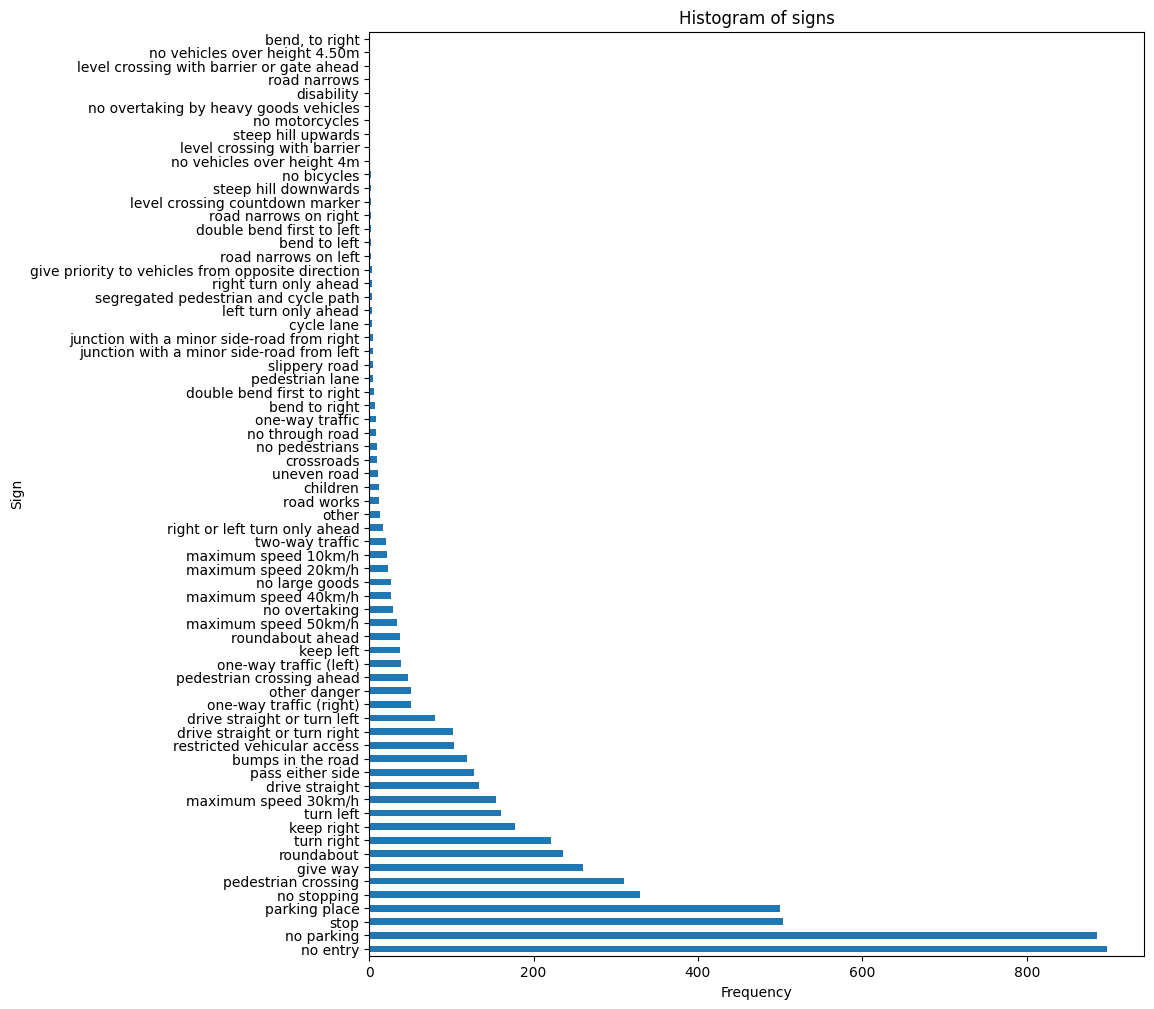

In [18]:
plt.figure(figsize=(10, 12))
df['name'].value_counts().plot(kind='barh')
plt.title('Histogram of signs')
plt.xlabel('Frequency')
plt.ylabel('Sign')
plt.show()

In [19]:
name_counts = df['name'].value_counts()

# Replace names with fewer than 80 entries with "other"
df['name'] = df['name'].apply(lambda x: x if name_counts[x] >= 80 else 'other')

smaller_dataframe = df.copy()
smaller_dataframe.to_csv('smaller_dataframe.csv', index=False)

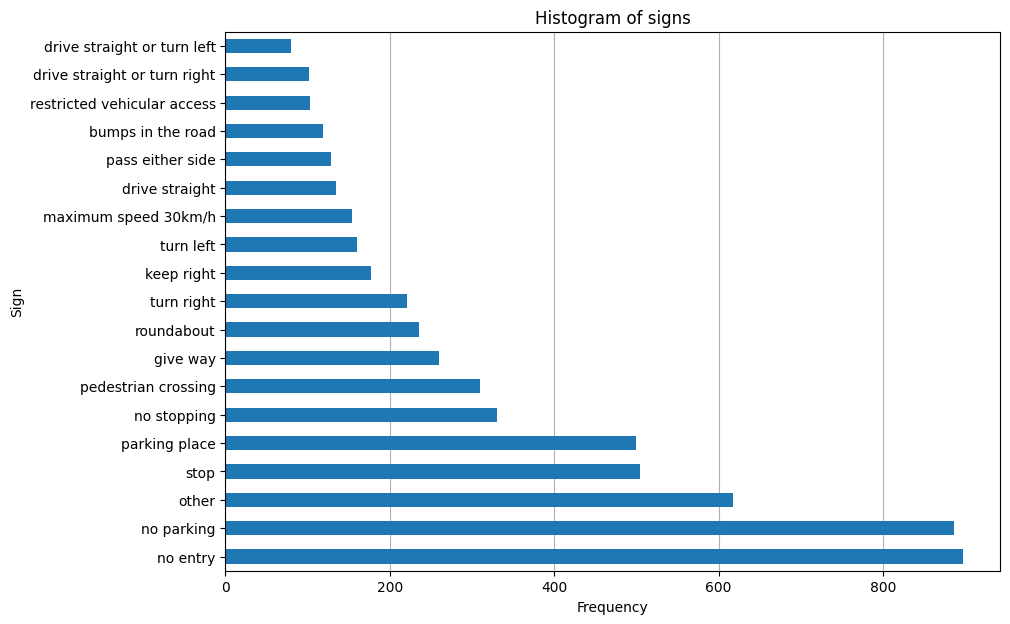

In [ ]:
plt.figure(figsize=(10, 7))
smaller_dataframe['name'].value_counts().plot(kind='barh')
plt.title('Histogram of signs')
plt.xlabel('Frequency')
plt.ylabel('Sign')

# Add horizontal grid lines
plt.grid(axis='x')
# Grid goes behind the bars
plt.gca().set_axisbelow(True)

plt.show()

In [ ]:
# Number of signs 
name_counts = df['name'].value_counts()
for name, count in name_counts.items():
    print(f'{name}: {count}')

no entry: 898
no parking: 886
other: 617
stop: 504
parking place: 500
no stopping: 330
pedestrian crossing: 310
give way: 260
roundabout: 236
turn right: 221
keep right: 177
turn left: 160
maximum speed 30km/h: 154
drive straight: 134
pass either side: 128
bumps in the road: 119
restricted vehicular access: 103
drive straight or turn right: 102
drive straight or turn left: 80


In [22]:
bounding_boxes = df[['width','xmin', 'ymin', 'xmax', 'ymax']]
print(bounding_boxes.describe().transpose())

# Normalize the bounding boxes
normalized_bounding_boxes = bounding_boxes.apply(lambda x: x / bounding_boxes['width'])
print(normalized_bounding_boxes.describe().transpose())

centers = [( (xmin + xmax) / 2, (ymin + ymax) / 2 ) for width, xmin, ymin, xmax, ymax in normalized_bounding_boxes.values]

        count        mean         std    min    25%    50%    75%    max
width  5919.0  501.457679   56.379081  200.0  512.0  512.0  512.0  512.0
xmin   5919.0  229.264065  129.874697    1.0  114.0  228.0  340.0  507.0
ymin   5919.0  173.663119   69.009198    1.0  126.0  175.0  217.0  453.0
xmax   5919.0  273.800473  133.957388    6.0  153.0  281.0  388.0  512.0
ymax   5919.0  226.533705   68.155232   16.0  183.0  222.0  263.0  512.0
        count      mean       std       min       25%       50%       75%  \
width  5919.0  1.000000  0.000000  1.000000  1.000000  1.000000  1.000000   
xmin   5919.0  0.456378  0.249201  0.001953  0.246094  0.455000  0.666016   
ymin   5919.0  0.347684  0.132848  0.001953  0.257812  0.349609  0.429688   
xmax   5919.0  0.547283  0.256999  0.011719  0.330078  0.570000  0.761719   
ymax   5919.0  0.455905  0.134764  0.031250  0.371094  0.441406  0.529297   

            max  
width  1.000000  
xmin   0.990234  
ymin   0.884766  
xmax   1.000000  
ymax   1.

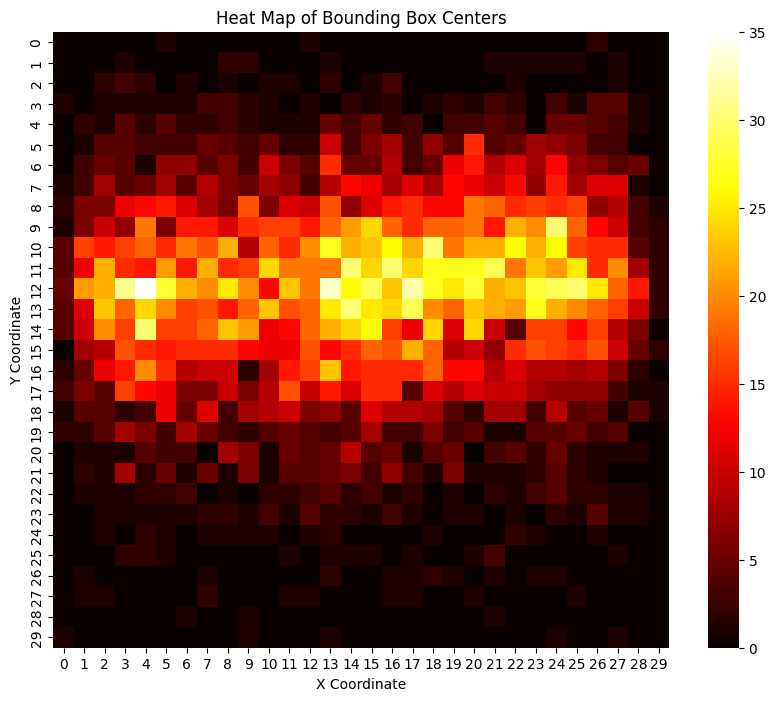

In [23]:
x_coords = [center[0] for center in centers]
y_coords = [center[1] for center in centers]

heatmap, xedges, yedges = np.histogram2d(x_coords, y_coords, bins=(30, 30))

# heatmap of centers
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap.T, cmap='hot', square=True)
plt.title('Heat Map of Bounding Box Centers')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

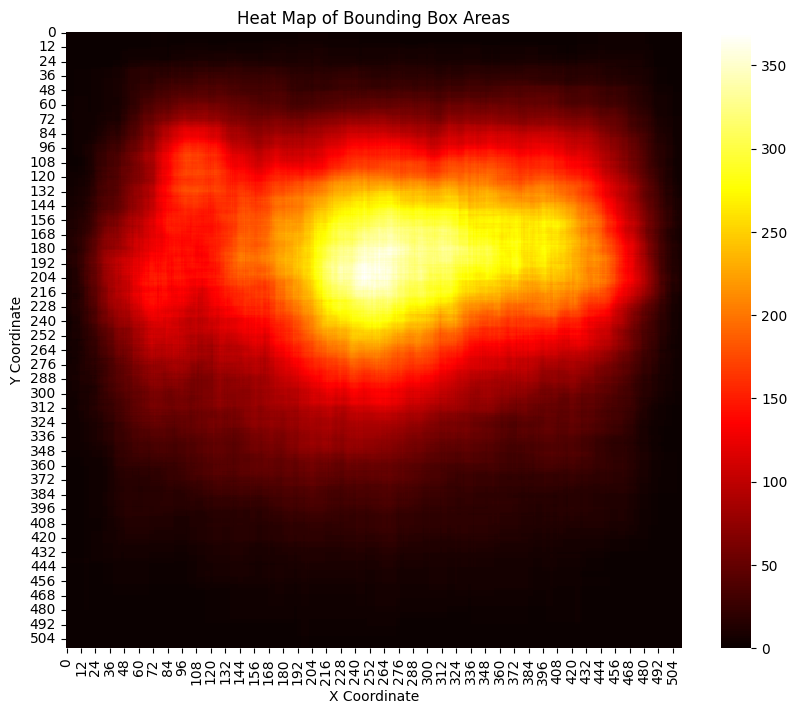

In [25]:
grid_size = (512, 512) # image size

heatmap = np.zeros(grid_size)

# Increment the grid cells for each bounding box
for xmin, ymin, xmax, ymax in bounding_boxes[['xmin', 'ymin', 'xmax', 'ymax']].values:
    heatmap[ymin:ymax, xmin:xmax] += 1

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap, cmap='hot', square=True)
plt.title('Heat Map of Bounding Box Areas')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

In [ ]:
# this dataframe contains only the images with more than one sign
filtered_df = df.groupby('filename').filter(lambda x: len(x) > 1)

print(filtered_df)
filtered_df.to_csv('filtered_dataframe.csv', index=False)

      filename  width                         name  truncated  xmin  ymin  \
2            2    200                   no parking          0   100    50   
3            2    200                        other          0    90    44   
16          15    200                parking place          0    49   117   
17          15    200                   no parking          0    49    98   
18          15    200                   no parking          0   109    76   
...        ...    ...                          ...        ...   ...   ...   
5913      3173    512                         stop          0   362    45   
5914      3174    512                   no parking          0    22   134   
5915      3174    512                   no parking          0   218    91   
5916      3174    512  restricted vehicular access          0    23    86   
5917      3174    512                parking place          0   404   126   

      xmax  ymax  
2      111    62  
3      144    88  
16      56   123  

In [27]:
df = filtered_df
roundabout_images = df[df['name'] == 'roundabout']['filename'].unique()

# Filter images containing "give way" within the roundabout images
give_way_in_roundabout = df[(df['filename'].isin(roundabout_images)) & (df['name'] == 'give way')]['filename'].unique()

# Conditional probability
probability = len(give_way_in_roundabout) / len(roundabout_images)

print(f"Probability of seeing a 'give way' sign given that there is a 'roundabout' sign: {probability}")

Probability of seeing a 'give way' sign given that there is a 'roundabout' sign: 0.847457627118644


In [28]:
signs = ['roundabout', 'give way','stop','no entry','maximum speed 30km/h','bumps in the road','turn right','keep right']

# Initialize a matrix to store the conditional probabilities
prob_matrix = np.zeros((len(signs), len(signs)))

# Calculate conditional probabilities
for i, sign1 in enumerate(signs):
    images_with_sign1 = df[df['name'] == sign1]['filename'].unique()
    for j, sign2 in enumerate(signs):
        if i != j:
            images_with_sign2 = df[(df['filename'].isin(images_with_sign1)) & (df['name'] == sign2)]['filename'].unique()
            prob_matrix[i, j] = len(images_with_sign2) / len(images_with_sign1)

# Convert the matrix to a DataFrame for better readability
prob_df = pd.DataFrame(prob_matrix, index=signs, columns=signs)

print("Conditional Probability Matrix:")
print(prob_df)

Conditional Probability Matrix:
                      roundabout  give way      stop  no entry  \
roundabout              0.000000  0.847458  0.062147  0.186441   
give way                0.746269  0.000000  0.034826  0.189055   
stop                    0.031519  0.020057  0.000000  0.212034   
no entry                0.075862  0.087356  0.170115  0.000000   
maximum speed 30km/h    0.043165  0.064748  0.064748  0.071942   
bumps in the road       0.022222  0.033333  0.077778  0.066667   
turn right              0.134831  0.185393  0.466292  0.348315   
keep right              0.511450  0.526718  0.137405  0.366412   

                      maximum speed 30km/h  bumps in the road  turn right  \
roundabout                        0.033898           0.011299    0.135593   
give way                          0.044776           0.014925    0.164179   
stop                              0.025788           0.020057    0.237822   
no entry                          0.022989           0.013793    

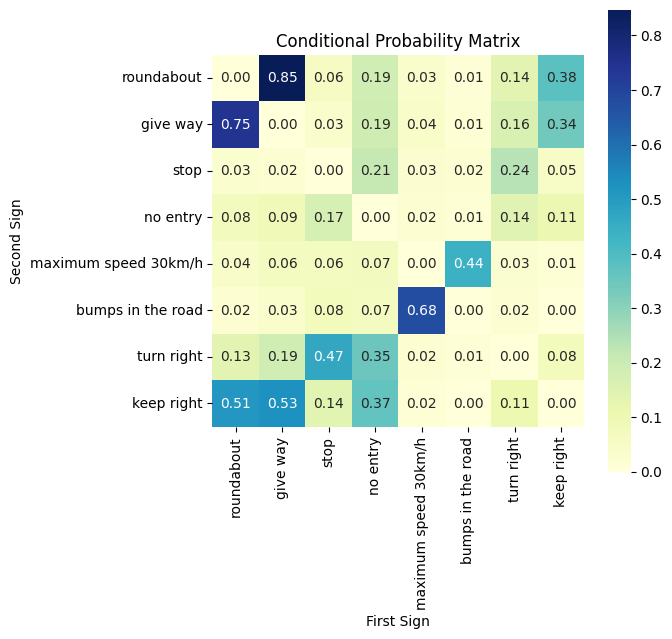

In [29]:
plt.figure(figsize=(6, 6))
sns.heatmap(prob_df, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True, square=True)

# Add labels
plt.title("Conditional Probability Matrix")
plt.xlabel("First Sign")
plt.ylabel("Second Sign")

plt.show()